# 1. Vehicle Loads and Design
## a)
> Discuss how the power train controls for the Honda and Toyota engines allow for a single curve of engine brake thermal efficiency *η<sub>eng</sub>* as a function of engine torque *T<sub>eng</sub>* at 2 different engine speeds


TODO need to answer this

> Make separate fits for *η<sub>eng</sub>* for the Honda and Toyota engines as a function of Teng. The fits will involve three parameters, *η<sub>eng,0</sub>*, *T<sub>1</sub>* and *T<sub>2</sub>* of the formula in the following form.

- [Honda data found here](https://catalog.data.gov/dataset/supporting-data-for-stuhldreher-m-kargul-j-barba-d-mcdonald-j-et-al-2018-benchmarking-a-20)
- [Toyota data found here](https://www.epa.gov/vehicle-and-fuel-emissions-testing/benchmarking-advanced-low-emission-light-duty-vehicle-technology#test-data)

,make,Speed,Torque (Nm),BTE
0,Toyota,1153,2.20,2.70
1,Toyota,1153,11.50,13.00
2,Toyota,1153,18.60,17.80
3,Toyota,1153,22.60,20.51
4,Toyota,1153,40.50,28.28
...,...,...,...,...
58,Honda,1251,121.22,33.75
59,Honda,1251,129.21,33.35
60,Honda,1251,134.98,33.16
61,Honda,1251,137.13,33.16


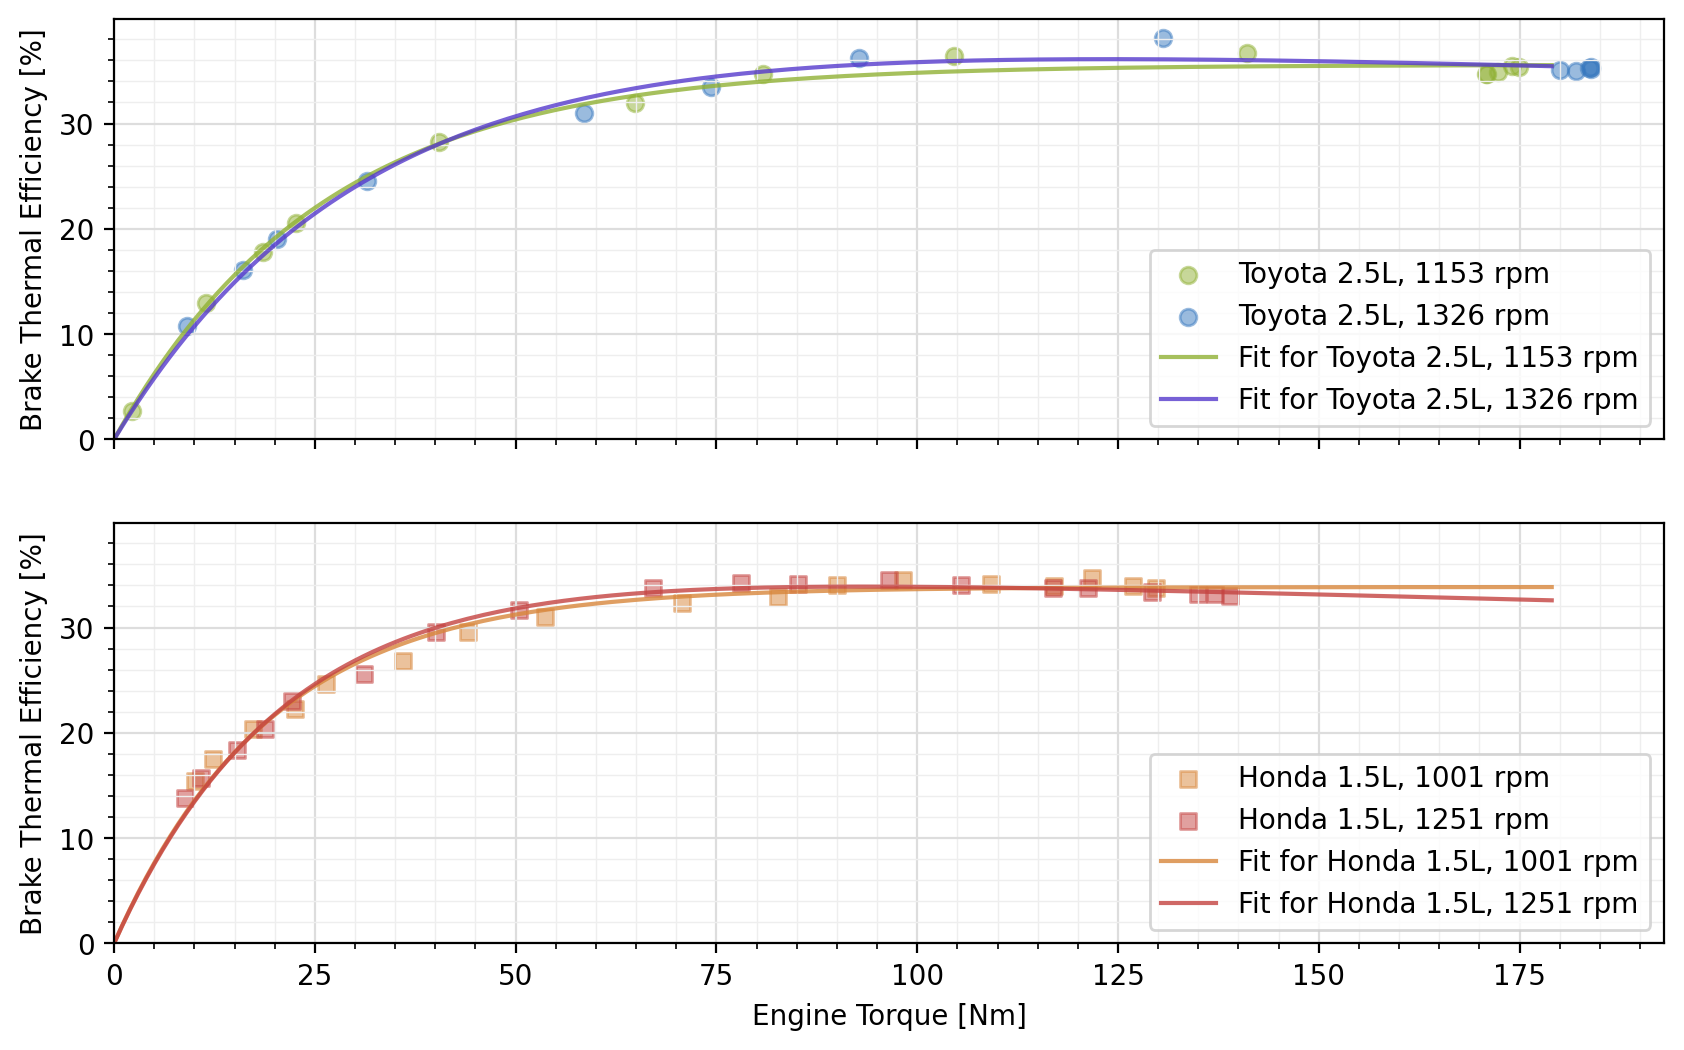

In [87]:
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hw_utils import palette, nice_grid
import scipy.optimize as opt


engine_data = pd.read_csv("./engine_test_data.csv")


toyota_1153 = engine_data.loc[
    (engine_data["make"] == "Toyota") & (engine_data["Speed"] == 1153)
]
toyota_1326 = engine_data.loc[
    (engine_data["make"] == "Toyota") & (engine_data["Speed"] == 1326)
]
honda_1001 = engine_data.loc[
    (engine_data["make"] == "Honda") & (engine_data["Speed"] == 1001)
]
honda_1251 = engine_data.loc[
    (engine_data["make"] == "Honda") & (engine_data["Speed"] == 1251)
]

fig, axs = plt.subplots(2, figsize=(10, 6), sharex=True, sharey=True)

axs[0].scatter(
    toyota_1153["Torque (Nm)"],
    toyota_1153["BTE"],
    color="xkcd:avocado",
    marker="o",
    label="Toyota 2.5L, 1153 rpm",
    alpha=0.5,
)
axs[0].scatter(
    toyota_1326["Torque (Nm)"],
    toyota_1326["BTE"],
    color=palette("blue"),
    marker="o",
    label="Toyota 2.5L, 1326 rpm",
    alpha=0.5,
)

axs[1].scatter(
    honda_1001["Torque (Nm)"],
    honda_1001["BTE"],
    color="xkcd:dull orange",
    marker="s",
    label="Honda 1.5L, 1001 rpm",
    alpha=0.5,
)
axs[1].scatter(
    honda_1251["Torque (Nm)"],
    honda_1251["BTE"],
    color="xkcd:reddish",
    marker="s",
    label="Honda 1.5L, 1251 rpm",
    alpha=0.5,
)
nice_grid(axs[0])
nice_grid(axs[1])
axs[0].set_xlim(0)
axs[0].set_ylim(0)
axs[1].set_xlim(0)
axs[1].set_ylim(0)


def efficiency_function(T_eng, eta_0, T_1, T_2):
    return eta_0 * (np.exp(-T_eng / T_1) - np.exp(-T_eng / T_2))


# curve fitting
popt_t1153, pcov = opt.curve_fit(
    efficiency_function,
    toyota_1153["Torque (Nm)"],
    toyota_1153["BTE"],
    [1e6, 1, 2020],
)
axs[0].plot(
    np.arange(0, 180),
    efficiency_function(np.arange(0, 180), *popt_t1153),
    color="xkcd:avocado",
    label="Fit for Toyota 2.5L, 1153 rpm",
    alpha=0.8,
)

popt_t1326, pcov = opt.curve_fit(
    efficiency_function,
    toyota_1326["Torque (Nm)"],
    toyota_1326["BTE"],
    [1e6, 1, 2020],
)
axs[0].plot(
    np.arange(0, 180),
    efficiency_function(np.arange(0, 180), *popt_t1326),
    color="xkcd:blurple",
    label="Fit for Toyota 2.5L, 1326 rpm",
    alpha=0.8,
)

popt_h1001, pcov = opt.curve_fit(
    efficiency_function,
    honda_1001["Torque (Nm)"],
    honda_1001["BTE"],
    [1e6, 1, 2020],
)
axs[1].plot(
    np.arange(0, 180),
    efficiency_function(np.arange(0, 180), *popt_h1001),
    color="xkcd:dull orange",
    label="Fit for Honda 1.5L, 1001 rpm",
    alpha=0.8,
)

popt_h1251, pcov = opt.curve_fit(
    efficiency_function,
    honda_1251["Torque (Nm)"],
    honda_1251["BTE"],
    [1e6, 1, 2020],
)
axs[1].plot(
    np.arange(0, 180),
    efficiency_function(np.arange(0, 180), *popt_h1251),
    color="xkcd:reddish",
    label="Fit for Honda 1.5L, 1251 rpm",
    alpha=0.8,
)

axs[0].legend()
axs[1].legend()
axs[1].set_xlabel("Engine Torque [Nm]")
axs[0].set_ylabel("Brake Thermal Efficiency [%]")
axs[1].set_ylabel("Brake Thermal Efficiency [%]")


engine_data

## b)

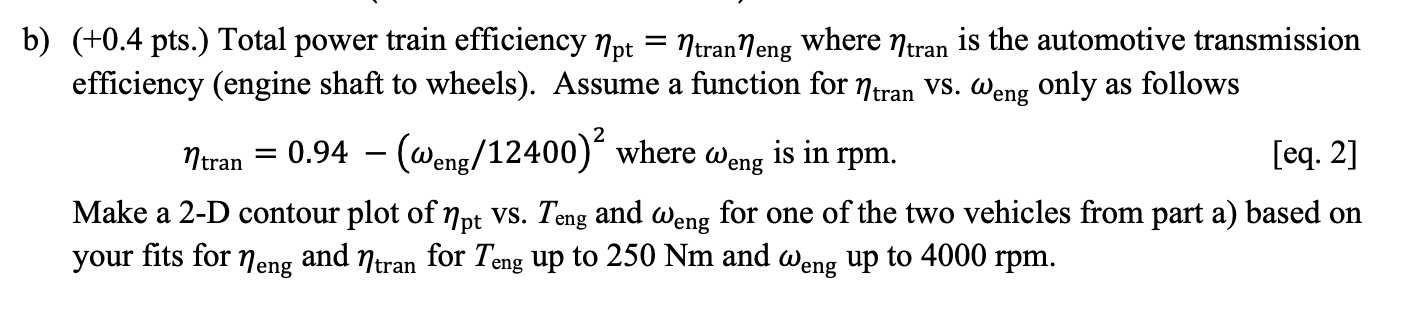


array([<Axes: >, <Axes: >], dtype=object)

Text(0.5, 1.0, 'Honda 1.5L, η_eng based on 1252 rpm fit')

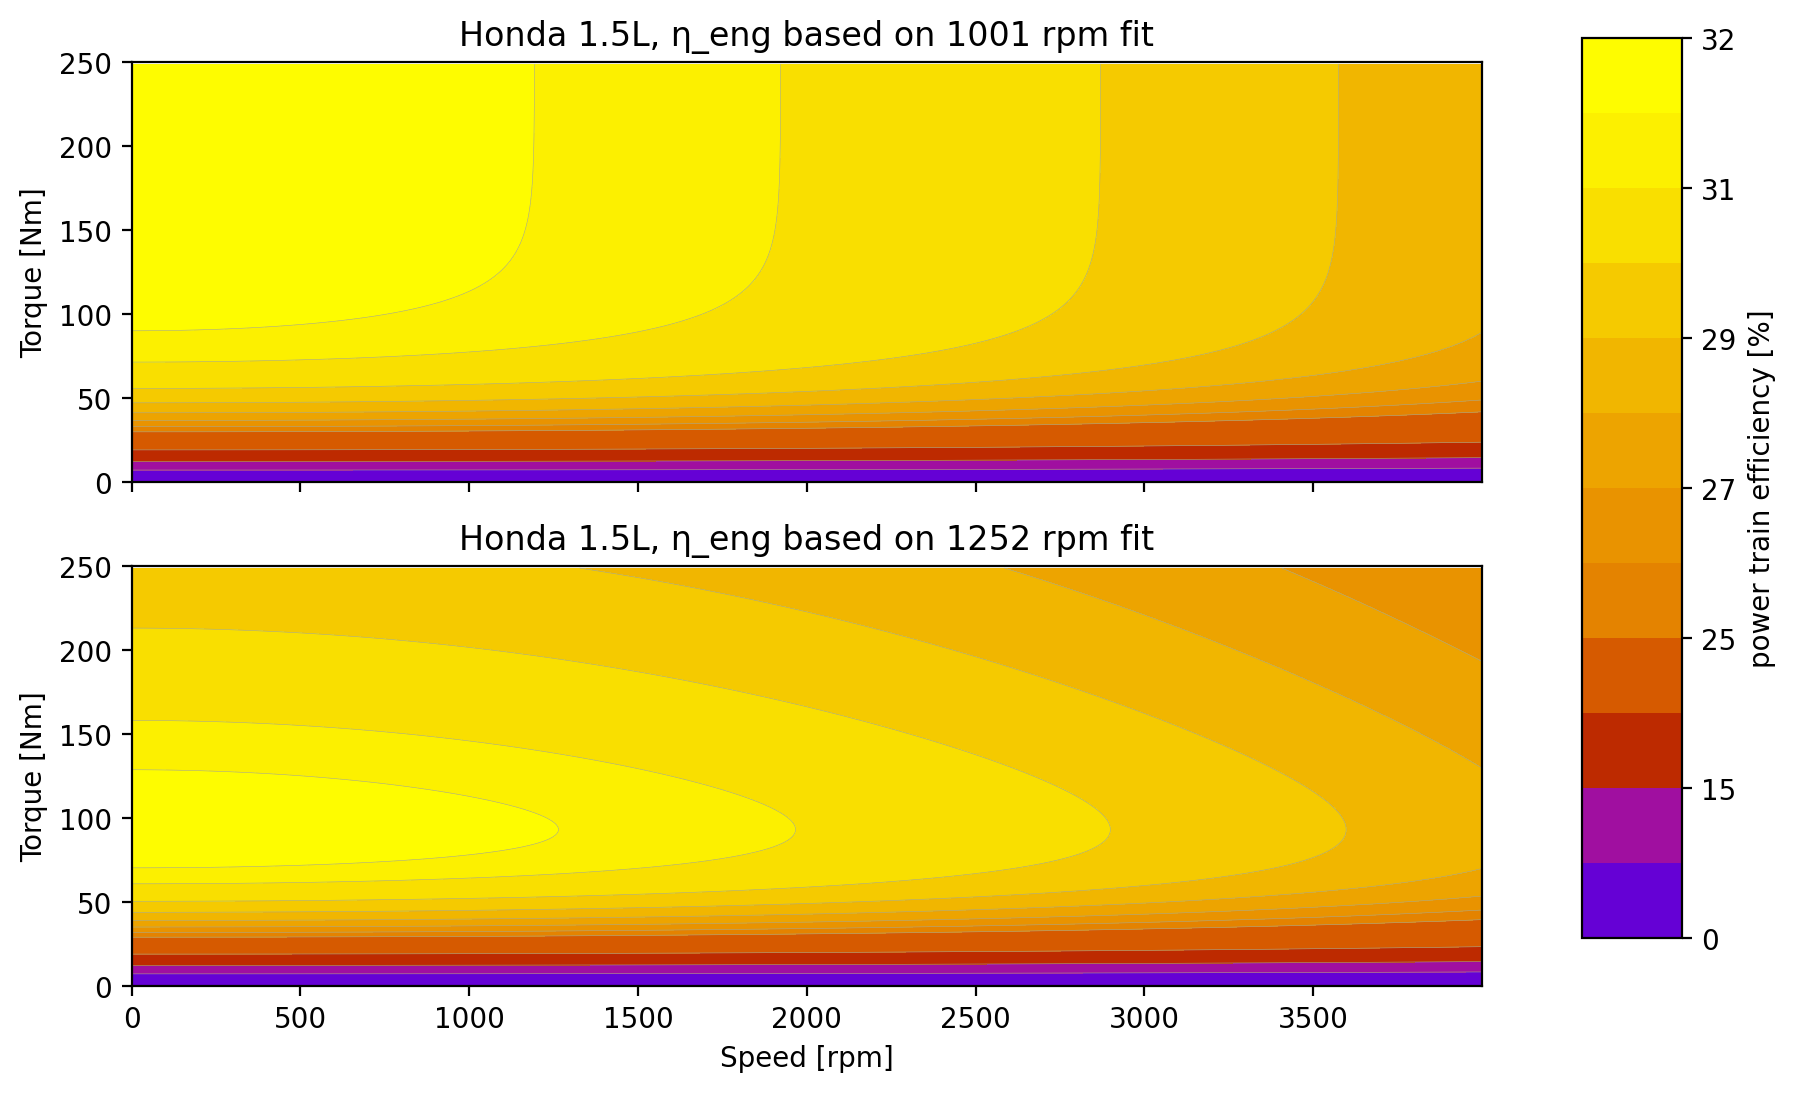

In [311]:
def transmission_efficiency(w_eng):
    return 0.94 - (w_eng / 12400) ** 2


fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize=(10, 6))

display(axs)
rpm, torque = np.meshgrid(np.arange(4000), np.arange(250))
levels = [
    0,
    10,
    15,
    20,
    25,
    26,
    27,
    28,
    29,
    30,
    31,
    31.5,
    32,
]
eff = transmission_efficiency(rpm) * efficiency_function(torque, *popt_h1001)
contourplot = axs[0].contourf(rpm, torque, eff, levels, cmap="gnuplot")
axs[0].contour(rpm, torque, eff, levels, colors=palette("grey"), linewidths=0.2)
eff = transmission_efficiency(rpm) * efficiency_function(torque, *popt_h1251)
contourplot2 = axs[1].contourf(rpm, torque, eff, levels, cmap="gnuplot")
axs[1].contour(rpm, torque, eff, levels, colors=palette("grey"), linewidths=0.2)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.75])
fig.colorbar(contourplot2, cax=cbar_ax, label="power train efficiency [%]")


axs[0].set_ylim(0, 250)
axs[1].set_xlabel("Speed [rpm]")
axs[0].set_ylabel("Torque [Nm]")
axs[1].set_ylabel("Torque [Nm]")
axs[0].set_title("Honda 1.5L, η_eng based on 1001 rpm fit")
axs[1].set_title("Honda 1.5L, η_eng based on 1252 rpm fit")

# 2. Battery Technology
a)
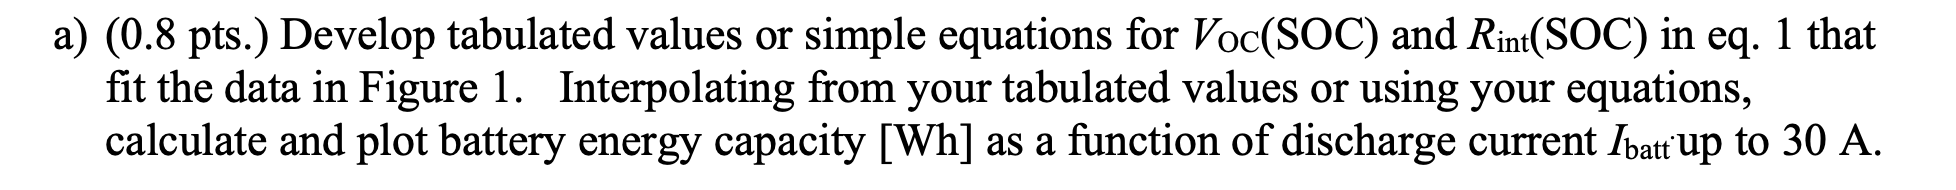

Extracted data from the plot using [this tool](https://apps.automeris.io/wpd/).

Here I'll plot what my tabulated values are.

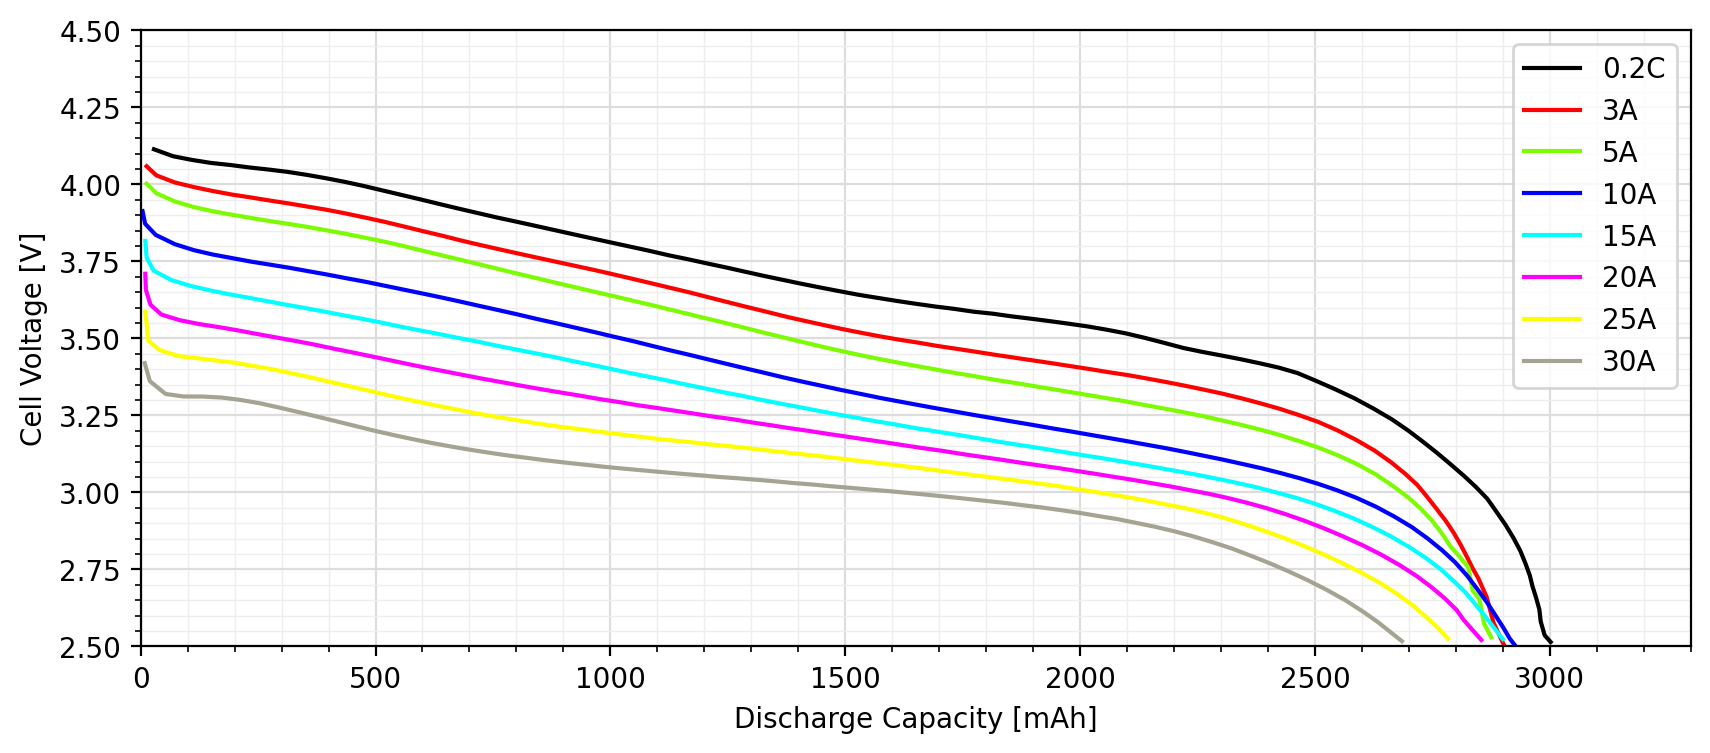

In [335]:
df_voltage = pd.read_csv("./voltage_soc_data.csv")

fig, ax = plt.subplots(figsize=(10, 4))

current_02 = df_voltage[df_voltage["Discharge Current (A)"] == 0.2]
current_3 = df_voltage[df_voltage["Discharge Current (A)"] == 3]
current_5 = df_voltage[df_voltage["Discharge Current (A)"] == 5]
current_10 = df_voltage[df_voltage["Discharge Current (A)"] == 10]
current_15 = df_voltage[df_voltage["Discharge Current (A)"] == 15]
current_20 = df_voltage[df_voltage["Discharge Current (A)"] == 20]
current_25 = df_voltage[df_voltage["Discharge Current (A)"] == 25]
current_30 = df_voltage[df_voltage["Discharge Current (A)"] == 30]
ax.plot(
    current_02["Discharge Capacity (mAh)"],
    current_02["Cell Voltage (V)"],
    color="black",
    label="0.2C",
)
ax.plot(
    current_3["Discharge Capacity (mAh)"],
    current_3["Cell Voltage (V)"],
    color="red",
    label="3A",
)
ax.plot(
    current_5["Discharge Capacity (mAh)"],
    current_5["Cell Voltage (V)"],
    color="lawngreen",
    label="5A",
)
ax.plot(
    current_10["Discharge Capacity (mAh)"],
    current_10["Cell Voltage (V)"],
    label="10A",
    color="blue",
)
ax.plot(
    current_15["Discharge Capacity (mAh)"],
    current_15["Cell Voltage (V)"],
    label="15A",
    color="aqua",
)
ax.plot(
    current_20["Discharge Capacity (mAh)"],
    current_20["Cell Voltage (V)"],
    label="20A",
    color="magenta",
)
ax.plot(
    current_25["Discharge Capacity (mAh)"],
    current_25["Cell Voltage (V)"],
    label="25A",
    color="yellow",
)
ax.plot(
    current_30["Discharge Capacity (mAh)"],
    current_30["Cell Voltage (V)"],
    label="30A",
    color=palette("grey"),
)
ax.legend()
ax.set_xlim(0, 3300)
ax.set_ylim(2.5, 4.5)
ax.set_xlabel("Discharge Capacity [mAh]")
ax.set_ylabel("Cell Voltage [V]")
nice_grid(ax)

Now let's plot battery energy capacity vs discharge current